### 2. Importing and Exploration of the dataset

### 1. Importing Libraries 

In [414]:
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

In [415]:
# loading the data and setting the unique client_id as the index::

df = pd.read_csv(r'C:\Users\divya\OneDrive\loans (1).csv', index_col = 'client_id')

In [416]:
# # showing the first 5 rows of the dataset:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [417]:
# To check the Dimensions of the dataset:
df.shape

(443, 7)

In [418]:
# Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


### 3. Checking the datatypes of the columns

In [419]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

### 4. Converting the data types of columns

    - loan_id to object
    - repaid to category dtype
    - loan_start and loan_end to date type

In [420]:
# loan_id:

df['loan_id'] = df['loan_id'].astype('object')

# repaid:

df['repaid'] = df['repaid'].astype('category')

In [421]:
# loan_start:

df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')


# loan_end:

df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

#### Checking the datatypes again:

### 5. Summary Statistics of the data

In [422]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [423]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,NaN,NaN
top,home,1.0,10243.0,NaN,NaN
freq,121,237.0,1.0,NaN,NaN
mean,NaN,NaN,NaN,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536
min,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
25%,NaN,NaN,NaN,2003-10-19 00:00:00,2005-09-12 12:00:00
50%,NaN,NaN,NaN,2007-03-10 00:00:00,2009-03-19 00:00:00
75%,NaN,NaN,NaN,2011-07-31 00:00:00,2013-09-11 12:00:00
max,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


### 6. Missing Values

In [424]:
# use isnull().sum() to check for missing values 
df.isnull().sum() 

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

There are no missing values in the data. 

Sk-learn library has an in-built function called Iterative Imputer to impute the missing values. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

----------------

### 7. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.

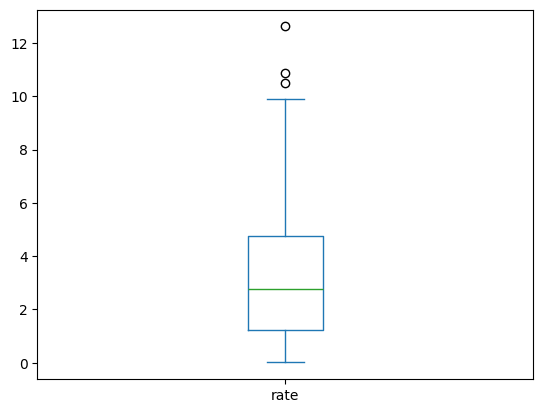

In [425]:
# For rate 
df['rate'].plot(kind='box')
plt.show()

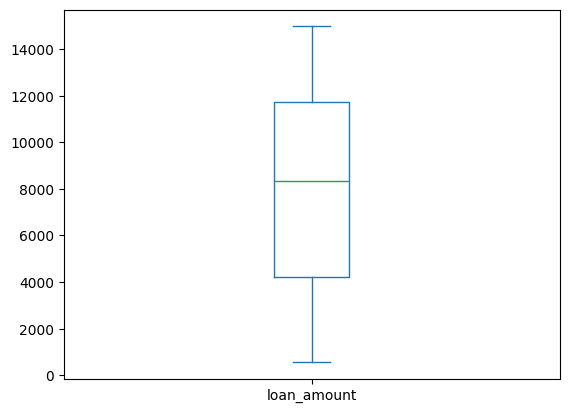

In [426]:
# For loan_amount 
df['loan_amount'].plot(kind='box')
plt.show()

In [427]:
# Summary Statistics for Numerical data:
df.describe()

,loan_amount,loan_start,loan_end,rate
count,443.000000,443,443,443.000000
mean,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,4172.891992,NaN,NaN,2.397168


We can see that there are no outliers in the loan_amount column and some outliers are present in the rate column. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here. 

### 8. Transformation

### 8a. SQRT transformation 

In [428]:
df['SQRT_RATE'] = df['rate']**0.5

In [429]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [430]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


In [431]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039


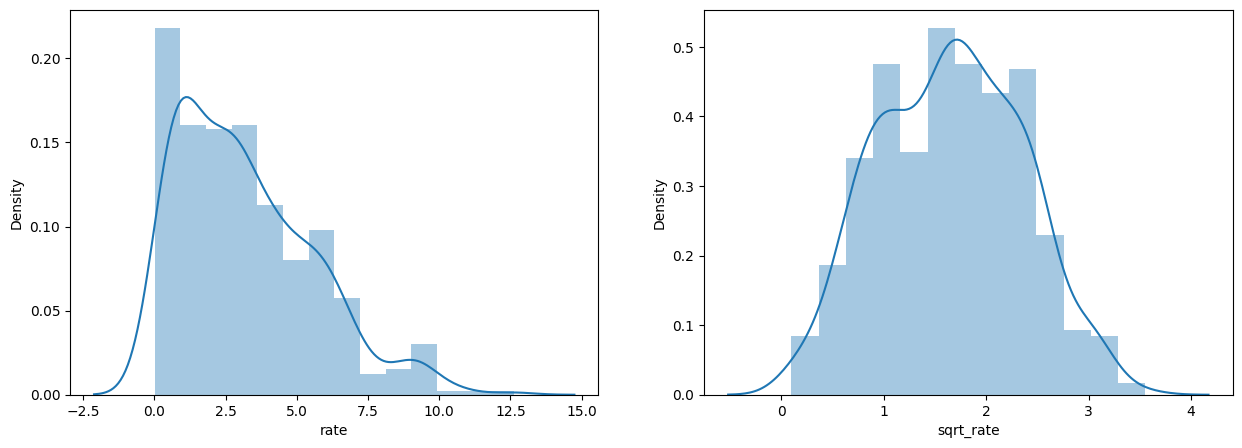

In [432]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()


### Result:

The Rate column was right skewed earlier. The skewness and kurtosis as reduced significantly. The transformed SQRT rate, on the right graph resembles normal distribution now.

### 8b. Log Transformation

In [433]:
df['Log Rate'] = np.log(df['rate'])

In [434]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [435]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log Rate'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['Log Rate'].kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewnss of the LOG transformed data is -1.5943217626331552

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is 4.157026150198228


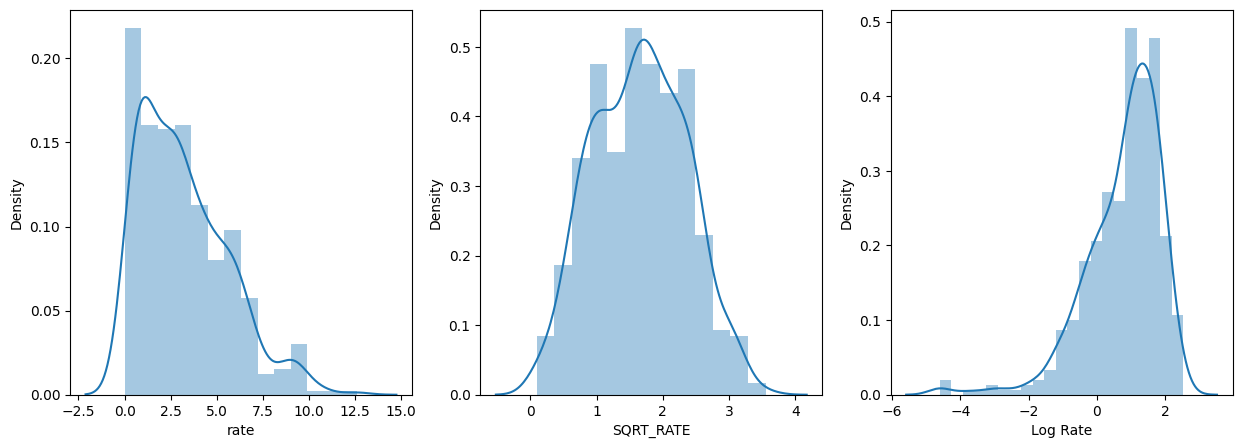

In [436]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()

### Inference:

Log Transformation made the rate left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable. 

In [437]:
## Using Lambda function :

df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [438]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,LOG_Rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.141033


There are other transformations available also called BoxCox. There is an inbuilt function in Sci-kit Learn library called PowerTransformer for this which can also be called to transform the data. We'll see how it works below. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html


-----------

### Outliers Treatment using Capping Approach

### 1) Z-Score approach to treat Outliers:

All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed

In [439]:
# loading the dataset and setting client id as index

df1 = pd.read_csv(r'C:\Users\divya\OneDrive\loans (1).csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [440]:
# loan_id:

df1['loan_id'] = df1['loan_id'].astype('object')

# repaid:

df1['repaid'] = df1['repaid'].astype('category')

In [441]:
# loan_start:

df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')


# loan_end:

df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [442]:
# 'SciPy' is used to perform scientific computations
import scipy.stats as stats

#### Using SciPy Library to calculate the Z-Score:

In [443]:
# Creating new variable with Z-score of each record:
df1['ZR'] = stats.zscore(df1['rate'])

In [444]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [445]:
# Combined Lower limit and Upper limit:

df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [446]:
# count of outliers:

df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [447]:
### Cleaned Data: without outliers so z>-3 and z< +3

df2= df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [448]:
df1.shape

(443, 8)

In [449]:
df2.shape

(440, 9)

#### Interpretation: 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [450]:
df3 = df2.copy()

In [451]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


-----------

### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.

In [452]:
# finding the Quantiles:

Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-3.9762499999999994

9.87375

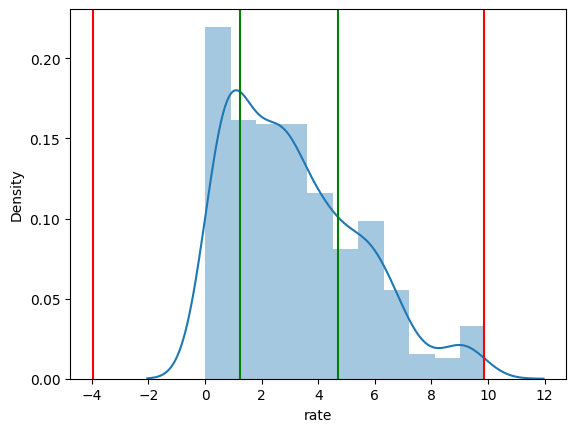

In [453]:
## Plot

sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [454]:
# Find count of Outliers wrt IQR

df3[(df3.rate<LC) | (df3.rate>UC)].reset_index(drop=True)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [455]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

1

In [456]:
## Store the clean data wrt IQR:

df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [457]:
df3.shape

(440, 8)

In [458]:
df4.shape

(439, 8)

#### Interpretation: 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

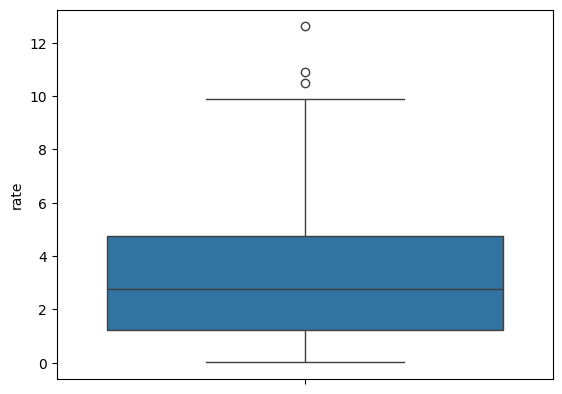

In [459]:
## Box Plot for rate--- based on IQR Method

sns.boxplot(df1.rate)
plt.show()

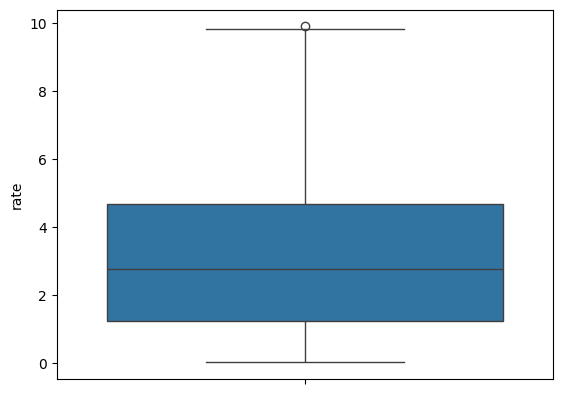

In [460]:
# Box Plot for rate --- based on Z-score cleaned data 

sns.boxplot(df2.rate)
plt.show()

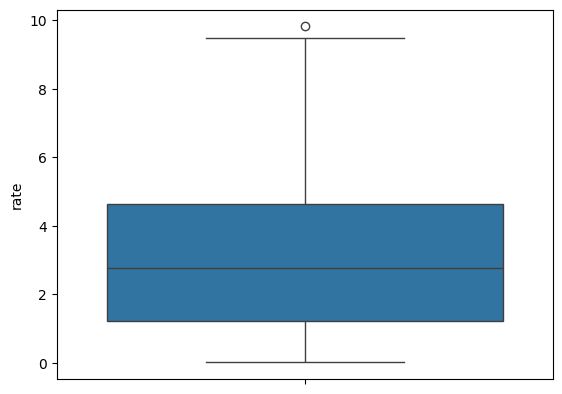

In [461]:
# Box Plot for rate --- based on IQR cleaned data 

sns.boxplot(df4.rate)
plt.show()

-------------------

### 9. Scaling the Numerical Features

There are two ways to scale the data: 

1) Standardization (Z-Score)\
2) Normalization: Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.

### 9a. Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:

In [462]:
# for Rate :
avg_rate = df3['rate'].mean()
avg_rate

3.161818181818182

In [463]:
std_rate = df3['rate'].std()
std_rate

2.3079474188229154

In [464]:
# Step 1 : transform using Z-score
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [465]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [466]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df3.rate.skew()))
print("The kurtosis for the original data is {}.".format(df3.rate.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))

The skewness for the original data is 0.7594062707815686.
The kurtosis for the original data is -0.05964248048746912.

The skewness for the Zscore Scaled column is 0.7594062707815691.
The kurtosis for the Zscore Scaled columns is -0.05964248048746823.


In [467]:
# For Loan_amount:
avg_LA = df3['loan_amount'].mean()
avg_LA

7997.195454545455

In [468]:
std_LA = df3['loan_amount'].std()
std_LA

4179.435966237437

In [469]:
# Step 1 : transform using Z-score
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [470]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [471]:
# checking if the skewness and kurtosis post scaling or not:

# For Loan_amount:

print("The skewness for the original data is {}.".format(df3.loan_amount.skew()))
print("The kurtosis for the original data is {}.".format(df3.loan_amount.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))

The skewness for the original data is -0.04678765472024289.
The kurtosis for the original data is -1.2354309429278456.

The skewness for the Zscore Scaled column is -0.04678765472024289.
The kurtosis for the Zscore Scaled columns is -1.2354309429278456.


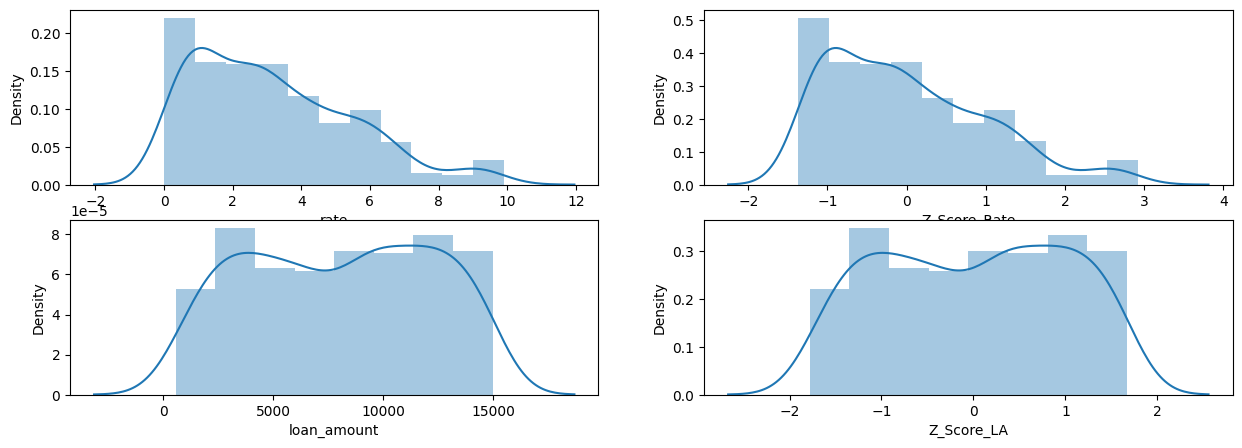

In [472]:

# Distribution of the columns

fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1,1])


plt.show()

The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is:
Skewness, Kurtosis and Distribution all remain same.

The need for Scaling is :

1) Comparison between variables is easier\
2) Computation power is more efficient and less time consuming.

#### By SkLearn:

Documentation for Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [473]:
# Loans data:

df4 = df3.copy()
df4.drop(columns = ['Z_Score_Rate'], inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.447996


In [474]:
from sklearn.preprocessing import StandardScaler

In [475]:
df4_num = df[['loan_amount','rate']]
df4_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [476]:
SS = StandardScaler()

scaled_x = SS.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

### 6b.  Normalization: Min Max Scalar

Scales the data using the formula (x - min)/(max - min)

#### Manually:

In [477]:
# ForeRate:
min_rate = df4.rate.min()
min_rate

0.01

In [478]:
max_rate = df4.rate.max()
max_rate

9.91

In [479]:
df4['Min_Max_R'] = (df4['rate'] - min_rate)/ (max_rate - min_rate)

In [480]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.rate.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.rate.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.kurt()))

The skewness for the original data is 0.7594062707815686.
The skewness for the Zscore Scaled column is 0.7594062707815691.
The skewness for the Min Max Scaled Data is 0.7594062707815686.

The kurtosis for the original data is -0.05964248048746912.
The kurtosis for the Zscore Scaled columns is -0.05964248048746823.
The kurtosis for the Min Max Scaled Data is -0.05964248048746823.


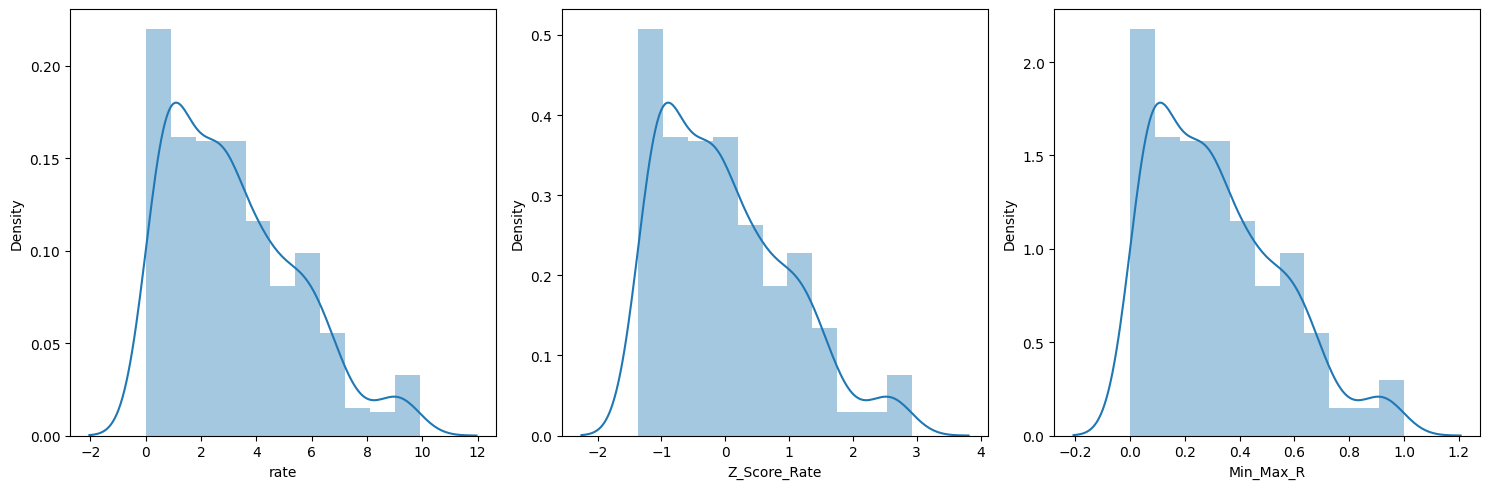

In [481]:
# Distribution of the columns

# For Rate

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])
sns.distplot(df4['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

In [482]:
# For Loan_amount:
min_LA = df4.loan_amount.min()
min_LA

559

In [483]:
max_LA = df4.loan_amount.max()
max_LA

14971

In [484]:
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA)/ (max_LA - min_LA)

In [485]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.loan_amount.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.loan_amount.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.kurt()))

The skewness for the original data is -0.04678765472024289.
The skewness for the Zscore Scaled column is -0.04678765472024289.
The skewness for the Min Max Scaled Data is -0.04678765472024256.

The kurtosis for the original data is -1.2354309429278456.
The kurtosis for the Zscore Scaled columns is -1.2354309429278456.
The kurtosis for the Min Max Scaled Data is -1.2354309429278452.


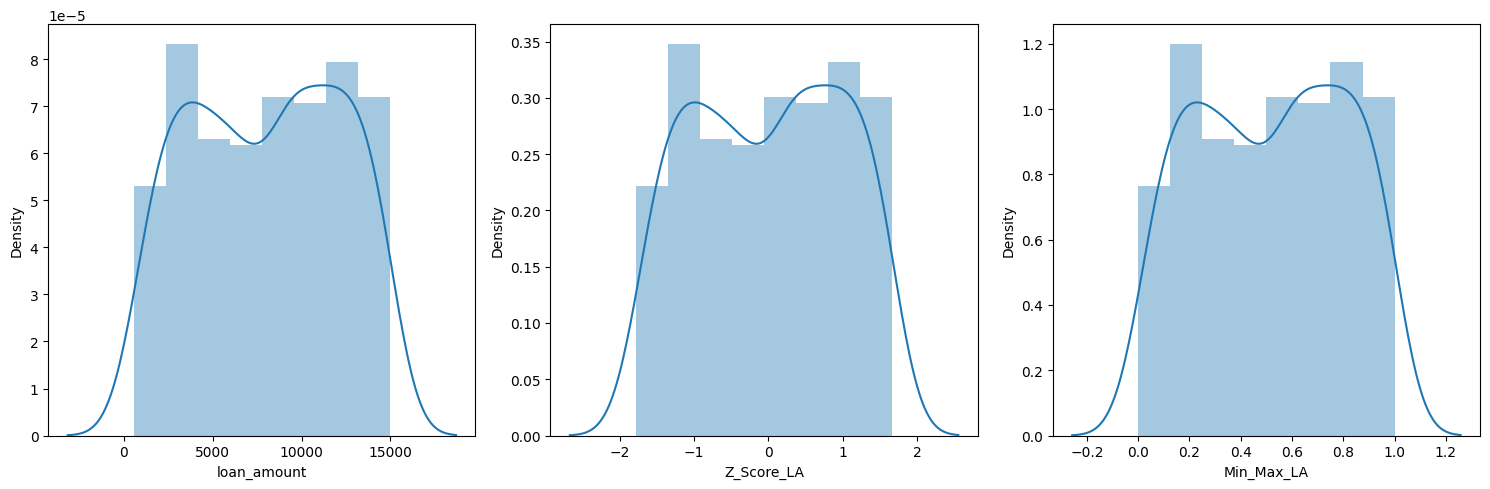

In [486]:
# Distribution of the columns

# For Loan_Amount

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1])
sns.distplot(df4['Min_Max_LA'], ax=axes[2])

plt.tight_layout()
plt.show()

#### By Sklearn:

Documentation for Min Max Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [487]:
from sklearn.preprocessing import MinMaxScaler

In [488]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

### Few things to keep in mind:

With Scaling all three - Skewness, Kurtosis and distribution remain same so there is no impact on outliers as well.

------------------

### 10. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using: 

1) pd.get_dummies\
2) sklearn's in-built function of OneHotEncoder and LabelEncoder

In [489]:
# Loans data:

df_loans = df3.copy()

In [490]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_LA'], inplace=True)

In [491]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [492]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [493]:
# Repaid is also a categoriy columns and creating dummies for loan_type
df_loans.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

### 1) pd.get_dummies approach:

In [494]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

# drop_first = True drops the first column for each feature

,credit,home,other
0,False,True,False
1,True,False,False
2,False,True,False
3,False,False,False
4,True,False,False


### 2. OneHot Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [495]:
from sklearn.preprocessing import OneHotEncoder

In [496]:
OE_tips = OneHotEncoder(drop ='first').fit(df_loans[['loan_type']])
OE_tips.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

### 3. Label Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [497]:
from sklearn.preprocessing import LabelEncoder

In [498]:
LE = LabelEncoder()

LE_tips = LE.fit(df_loans[['loan_type']])

In [499]:
LE_tips.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [500]:
# transform any new values to Dummy variables via Label Encoder
LE_tips.transform(['other', 'cash', 'home', 'credit'])

array([3, 0, 2, 1])

In [501]:
# Inverse transform to get original values from the dummy variables:
LE_tips.inverse_transform([1,2,3,0])

array(['credit', 'home', 'other', 'cash'], dtype=object)

----------------

### 11. Creating new Derived Features

We can use the loan_start and loan_end features to calculate the tenure of the loan

In [502]:
import datetime as dt

In [503]:
df_loans['loan_tenure'] =  df_loans['loan_end'] - df_loans['loan_start']

In [504]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [505]:
df_loans.dtypes

client_id                int64
loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

The number of days in the tenure are currently in TimeDelta, we want it integer hence will do the conversion as follows:

In [506]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

0      613
1      635
2      519
3      879
4      684
      ... 
435    928
436    511
437    948
438    633
439    638
Name: loan_tenure, Length: 440, dtype: int64

In [507]:
## Tenure in number of Years:

df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans['loan_tenure']

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
435    2.542466
436    1.400000
437    2.597260
438    1.734247
439    1.747945
Name: loan_tenure, Length: 440, dtype: float64

### 12. Training and Testing data

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [508]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_loans['loan_type']= label_encoder.fit_transform(df_loans['loan_type']) 
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,2,13672,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,1,9794,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,2,12734,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,0,12518,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,1,14049,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [509]:
## Splitting for X and Y variables:

Y = df_loans['repaid']
X = df_loans.drop(['repaid','client_id','loan_start','loan_end','loan_id'], axis=1)

In [510]:
# Dependent or Target Variable

Y.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

In [511]:
# Independent Variable

X.head()

,loan_type,loan_amount,rate,loan_tenure
0,2,13672,2.15,1.679452
1,1,9794,1.25,1.739726
2,2,12734,0.68,1.421918
3,0,12518,1.24,2.408219
4,1,14049,3.13,1.873973


To statistically test if the train and test representative of the overall data, would compute the Median for the independent variables for both the test and train sets.

In [512]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (352, 4)
The shape of X_test is: (88, 4)

The shape of Y_train is: (352,)
The shape of Y_test is: (88,)


In [513]:
X_train.head()

,loan_type,loan_amount,rate,loan_tenure
82,2,2203,7.40,1.520548
436,1,1728,5.27,1.400000
23,2,11799,6.52,2.542466
147,3,2932,3.60,2.156164
427,0,9249,2.86,2.380822


In [514]:
Y_train.head()
Y_train.dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [515]:
# LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

In [516]:
# Prediction
y_pred = clf.predict(X_test)

In [517]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [518]:
model_accuracies = {}

In [519]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_pred)
model_accuracies['LogisticRegression'] = acc*100

In [520]:
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.2f}%")

LogisticRegression Accuracy: 56.82%


In [521]:
print(model_accuracies)

{'LogisticRegression': 56.81818181818182}


In [522]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 4 33]
 [ 5 46]]


           Negative  Positive
Actual Neg   TN (4)    FP (41)

       Pos   FN (9)    TP (34)


True Negatives (TN) = 4: The model correctly predicted 4 instances as 'Not Default' (negative class).
False Positives (FP) = 41: The model incorrectly predicted 41 instances as 'Default' (positive class) when they were actually 'Not Default'.
False Negatives (FN) = 9: The model incorrectly predicted 9 instances as 'Not Default' when they were actually 'Default'.
True Positives (TP) = 34: The model correctly predicted 34 instances as 'Default'.

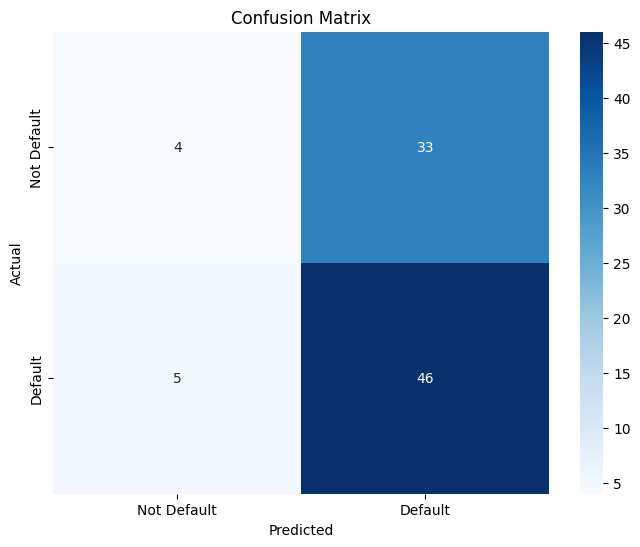

In [523]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

-----------------

In [524]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

# Initialize the dictionary
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dclf = classifier.fit(X_train, Y_train)  

In [525]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

In [526]:
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [527]:
classifier_dt.fit(X_train, Y_train)
y_pred_dt = classifier_dt.predict(X_test)
acc_dt = accuracy_score(Y_test, y_pred_dt)
model_accuracies['DecisionTreeClassifier'] = acc_dt*100

In [528]:
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.2f}%")

LogisticRegression Accuracy: 56.82%
DecisionTreeClassifier Accuracy: 52.27%


In [529]:
print(model_accuracies)

{'LogisticRegression': 56.81818181818182, 'DecisionTreeClassifier': 52.27272727272727}


In [530]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, y_pred)  
cm

array([[20, 17],
       [25, 26]], dtype=int64)

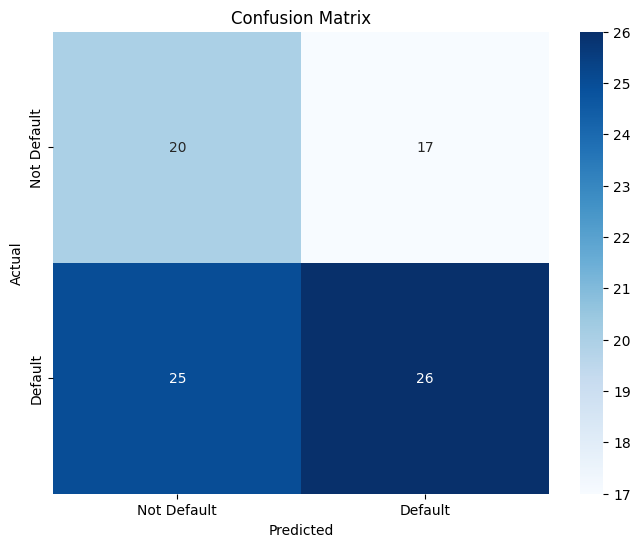

In [531]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Conclusion:

By Using Decision Tree alogrithm we could able to fetch better output than using Logistic Regression

TASK: valid in similar way with RandomForestClassifier, NeuralNetworks and and find the best model. 

In [532]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=15)

In [533]:
# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=15)

In [534]:
# Make predictions on the testing data
predictions = rf_classifier.predict(X_test)

In [535]:
accuracy = accuracy_score(Y_test, predictions)
model_accuracies['RandomForestClassifier'] = accuracy*100

In [536]:
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.2f}%")

LogisticRegression Accuracy: 56.82%
DecisionTreeClassifier Accuracy: 52.27%
RandomForestClassifier Accuracy: 54.55%


In [537]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[21 16]
 [24 27]]


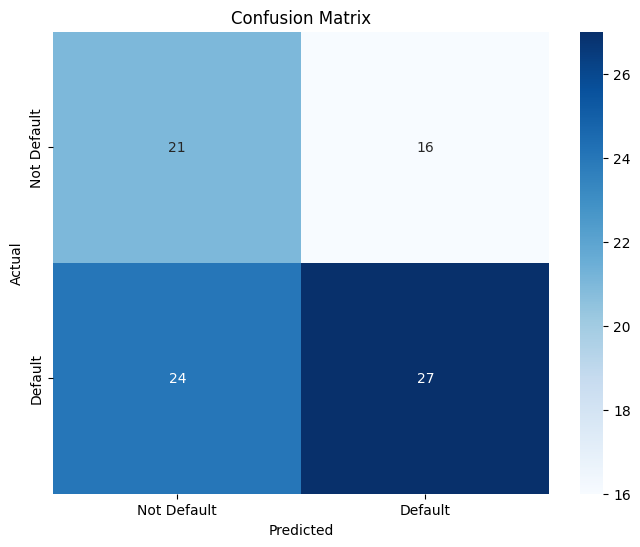

In [538]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [539]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.models import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import BatchNormalization

In [540]:
# Load the dataset
data = pd.read_csv(r'C:\Users\divya\OneDrive\loans (1).csv')

In [541]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [542]:
# Preprocessing
# Assuming you have already handled missing values and encoded categorical variables
# Splitting the data into features and target variable
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [543]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the target variable
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.fit_transform(Y_test)

In [544]:
# Building the neural network
model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [545]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',  # Monitor accuracy      
    patience=50 ,# Stop if no improvement for 3 epochs
    min_delta=0.001,     # Minimum change required for improvement
    verbose=10            # Print early stopping logs
)

# Compile and train your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
History=model.fit(X_train_scaled, Y_train_encoded,validation_data= (X_test_scaled,Y_test_encoded),epochs=400,batch_size=4, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5119 - loss: 0.9358 - val_accuracy: 0.5682 - val_loss: 0.7266
Epoch 2/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5044 - loss: 0.8368 - val_accuracy: 0.5682 - val_loss: 0.7441
Epoch 3/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4885 - loss: 0.7607 - val_accuracy: 0.5682 - val_loss: 0.7412
Epoch 4/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5304 - loss: 0.7399 - val_accuracy: 0.5682 - val_loss: 0.7457
Epoch 5/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5310 - loss: 0.7587 - val_accuracy: 0.5682 - val_loss: 0.7392
Epoch 6/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5616 - loss: 0.7014 - val_accuracy: 0.5682 - val_loss: 0.7299
Epoch 7/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5839 - loss: 0.7372 - val_accuracy: 0.5682 - val_loss: 0.7047
Epoch 8/400
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5393 - loss: 0.7573 - val_accuracy: 0.5682 - 

In [546]:
model_accuracies['Sequential'] = test_accuracy*100

In [547]:
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.2f}%")

LogisticRegression Accuracy: 56.82%
DecisionTreeClassifier Accuracy: 52.27%
RandomForestClassifier Accuracy: 54.55%
Sequential Accuracy: 56.82%


In [548]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

def main(file_path, model_accuracies):
    # Load the data
    loan_data = pd.read_csv(file_path)

    # Process loan start and end dates
    loan_data['loan_start'] = pd.to_datetime(loan_data['loan_start'])
    loan_data['loan_end'] = pd.to_datetime(loan_data['loan_end'])

    # Calculate loan duration
    loan_data['loan_duration'] = (loan_data['loan_end'] - loan_data['loan_start']).dt.days

    # Feature engineering: One-hot encoding for loan types
    loan_data = pd.get_dummies(loan_data, columns=['loan_type'])

    # Prepare the feature matrix and target vector
    X = loan_data.drop(columns=['loan_id', 'loan_start', 'loan_end', 'client_id'])
    y = loan_data['loan_amount']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Find the model with the highest accuracy
    best_model_name = max(model_accuracies, key=model_accuracies.get)
    print(best_model_name)

    # Train the best model
    model = None
    if best_model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier()
    elif best_model_name == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif best_model_name == 'LogisticRegression':
        model = LogisticRegression()
    elif best_model_name == 'Sequential':
        # Initialize and compile the Keras model
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
        model.add(Dense(32, activation='relu'))  # Hidden layer
        model.add(Dense(1, activation='linear'))  # Output layer for regression
        model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model

    if model is None:
        raise ValueError(f"Model '{best_model_name}' is not supported.")

    model.fit(X_train, y_train)

    # Identify loan type columns
    loan_type_columns = [col for col in X.columns if col.startswith('loan_type_')]

    # Predict loan amounts for the training data
    y_train_pred = model.predict(X_train)

    # Prepare DataFrame with predicted amounts and loan types using original indices
    df_train_pred = pd.DataFrame(y_train_pred, columns=['predicted_loan_amount'], index=y_train.index)
    for col in loan_type_columns:
        df_train_pred[col] = loan_data.iloc[y_train.index][col].values

    # Melt the DataFrame to long format for grouping
    df_melted = df_train_pred.melt(id_vars=['predicted_loan_amount'], value_vars=loan_type_columns, var_name='loan_type', value_name='value')
    df_melted = df_melted[df_melted['value'] == 1].drop(columns=['value'])

    # Calculate the min and max predicted loan amounts for each loan type
    max_min_loan_amounts = df_melted.groupby('loan_type')['predicted_loan_amount'].agg(['max', 'min']).reset_index()

    # Process new loan data
    new_loan_start = datetime.strptime(input("Enter loan start date (YYYY-MM-DD): "), '%Y-%m-%d')
    new_loan_end = datetime.strptime(input("Enter loan end date (YYYY-MM-DD): "), '%Y-%m-%d')
    new_interest_rate = float(input("Enter interest rate: "))

    # Calculate loan duration for the new loan
    new_loan_duration = (new_loan_end - new_loan_start).days

    # Prepare new loan data for prediction
    new_loan_data = pd.DataFrame({
        'rate': [new_interest_rate],
        'loan_duration': [new_loan_duration]
    })

    # Add one-hot encoded loan type columns
    for col in X.columns:
        if col.startswith('loan_type_'):
            new_loan_data[col] = 0

    # Get the new loan type
    new_loan_type = input("Enter the loan type: ")
    loan_type_col = f'loan_type_{new_loan_type}'
    if loan_type_col in new_loan_data.columns:
        new_loan_data[loan_type_col] = 1
    else:
        raise ValueError(f"Loan type '{new_loan_type}' is not recognized.")

    # Standardize the new loan data
    new_loan_data = new_loan_data.reindex(columns=X.columns, fill_value=0)
    new_loan_data_scaled = scaler.transform(new_loan_data)

    # Predict loan type
    prediction = model.predict(new_loan_data_scaled)
    if prediction[0] == 0:
        print("The person is not eligible for the loan.")
    else:
        print("The person is eligible for the loan.")

    # Get the new loan amount and check eligibility based on range
    new_loan_amount = float(input("Enter loan amount: "))

    # Check if the new loan amount is within the predicted range
    loan_type_range = max_min_loan_amounts[max_min_loan_amounts['loan_type'] == loan_type_col]
    if loan_type_range.empty:
        print(f"Loan type '{new_loan_type}' is not recognized.")
        return

    min_amount, max_amount = loan_type_range['min'].values[0], loan_type_range['max'].values[0]

    if new_loan_amount < min_amount or new_loan_amount > max_amount:
        print(f"The loan amount is not within the allowed range ({min_amount} - {max_amount}).")
        print("The person is not eligible for the loan.")
    else:
        print("The person is eligible for the loan.")

# Call the main function with your CSV file and model accuracies
# Example: main(r'C:\Users\divya\OneDrive\loans (1).csv', model_accuracies)


In [549]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
df_loans['loan_type_encoded']= label_encoder.fit_transform(df_loans['loan_type'])

In [550]:
Y = df_loans['loan_amount']
X = df_loans.drop(['repaid','client_id','loan_start','loan_end','loan_id'], axis=1)

In [551]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)                                                                                                                                                                                            
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
Y_train_pred = model.predict(X_train_scaled)
Y_test_pred = model.predict(X_test_scaled)

In [552]:
df_train_pred = pd.DataFrame({
    'loan_type': X_train['loan_type_encoded'],
    'predicted_loan_amount': Y_train_pred
})
max_min_loan_amounts = df_train_pred.groupby('loan_type')['predicted_loan_amount'].agg(['max', 'min']).reset_index()
print(max_min_loan_amounts)

   loan_type      max    min
0          0  14946.0  765.0
1          1  14721.0  559.0
2          2  14784.0  653.0
3          3  14942.0  986.0
